In [31]:
!pip install matplotlib

In [66]:
import pandas as pd
import matplotlib 
from matplotlib import rc, font_manager

In [67]:
import matplotlib.pyplot as plt

In [106]:
data = pd.read_excel('data_4119_20210325.xlsx', usecols = 'A:B')
endf = data.rename(columns={"종가": "FINAL"})
endf

,date,final
0,2021/03/25,3008.33
1,2021/03/24,2996.35
2,2021/03/23,3004.74
3,2021/03/22,3035.46
4,2021/03/19,3039.53
...,...,...
789,2018/01/08,2513.28
790,2018/01/05,2497.52
791,2018/01/04,2466.46
792,2018/01/03,2486.35


In [107]:
name_df = endf.set_index("date")
name_df.head()

,final
date,
2021/03/25,3008.33
2021/03/24,2996.35
2021/03/23,3004.74
2021/03/22,3035.46
2021/03/19,3039.53


In [126]:
ndf = name_df.sort_values('date')

ndf.iloc[0]

final    2479.65
Name: 2018/01/02, dtype: float64

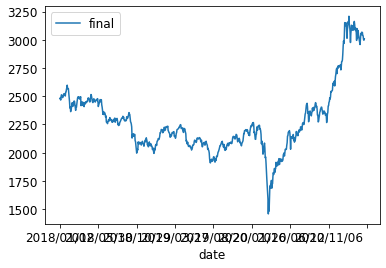

In [127]:
ndf.plot()
plt.show()

In [128]:
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

In [139]:
model = ARIMA(ndf.final.values, order=(2,1,2))

model_fit = model.fit(trend='nc', full_output=True, disp=True)

fit = model_fit 
print(model_fit.summary())

C:\Users\ljhbo\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\ljhbo\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.AR

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  793
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -3739.829
Method:                       css-mle   S.D. of innovations             27.033
Date:                Thu, 25 Mar 2021   AIC                           7489.658
Time:                        19:20:18   BIC                           7513.037
Sample:                             1   HQIC                          7498.643
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1.D.y      0.6230      0.180      3.453      0.001       0.269       0.977
ar.L2.D.y     -0.4334      0.203     -2.137      0.033      -0.831      -0.036
ma.L1.D.y     -0.6381      0.166     -3.834      0.0

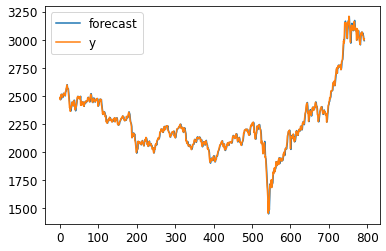

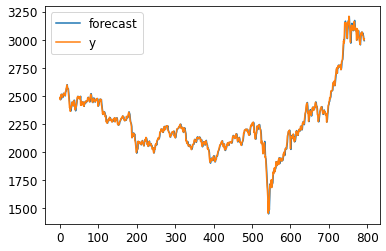

In [140]:
model_fit.plot_predict()

In [138]:
fore = fit.forecast(steps = 1)
print(fore)

(array([3004.4411756]), array([27.03315815]), array([[2951.45715925, 3057.42519196]]))
